In [1]:
from gan.utils import *
from gan.gan import *
from gan.evaluation_utils import *
from gan.metrics import *
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Train and evaluate a SRGAN

In [2]:
NAME = 'L1'

## Achitecture Settings
N_RES = 7

## Optimization settings
DLR = 2.5e-6
GLR = 2e-5
BETA1 = 0.9

DLR2 = 2e-6
GLR2 = 6e-6

STEPS = 4 # number of G updates per D update

# Loss functions settings
GEN_REG = 5e4
FEAT_REG = 1e-1

L1_REG = True
TV_REG = 0
VGG_REG = False

BATCH_SIZE = 50


Epoch: 0, Iter: 0, D: 0.5015, G:3.727e+04


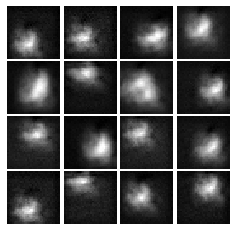

Epoch: 12, Iter: 50, D: 0.4132, G:3.468e+04


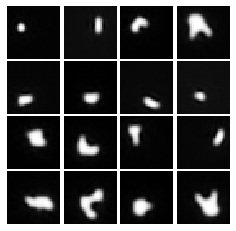

Epoch: 25, Iter: 100, D: 0.2574, G:3.368e+04


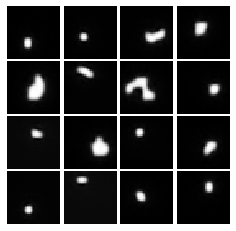

Epoch: 37, Iter: 150, D: 0.06715, G:3.202e+04


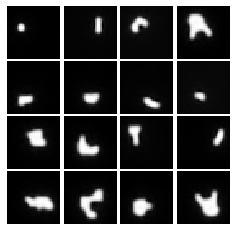

Epoch: 50, Iter: 200, D: 0.00978, G:3.199e+04


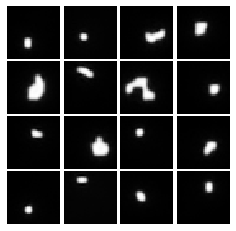

Epoch: 62, Iter: 250, D: 0.004553, G:3.317e+04


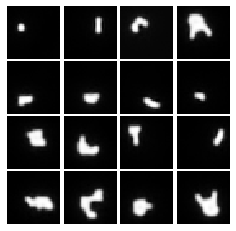

Epoch: 75, Iter: 300, D: 0.0009327, G:3.438e+04


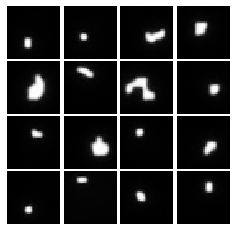

Epoch: 87, Iter: 350, D: 0.0007851, G:3.481e+04


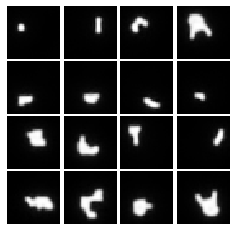

Epoch: 100, Iter: 400, D: 0.000328, G:3.501e+04


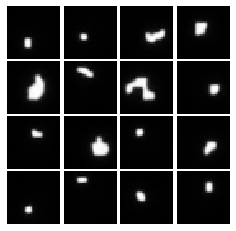

Epoch: 112, Iter: 450, D: 0.0004515, G:3.492e+04


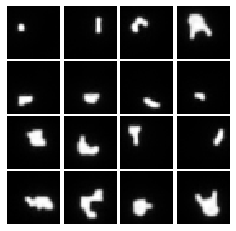

Epoch: 125, Iter: 500, D: 0.000232, G:3.5e+04


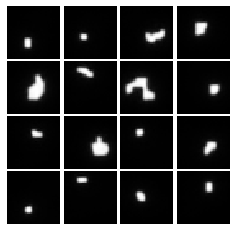

Epoch: 137, Iter: 550, D: 0.000313, G:3.491e+04


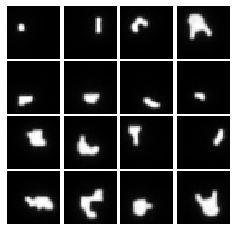

Epoch: 150, Iter: 600, D: 0.0001727, G:3.506e+04


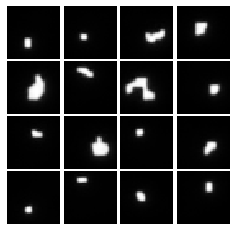

Epoch: 162, Iter: 650, D: 0.0002124, G:3.492e+04


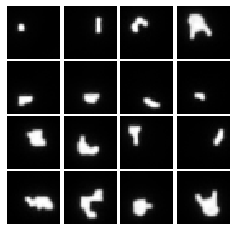

Epoch: 175, Iter: 700, D: 0.0001164, G:3.497e+04


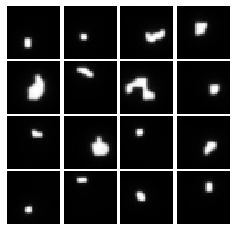

Epoch: 187, Iter: 750, D: 0.000157, G:3.491e+04


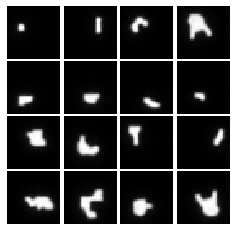

Final images


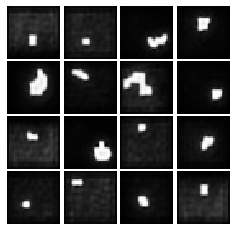

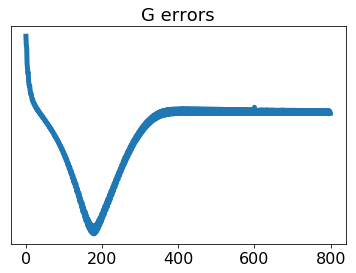

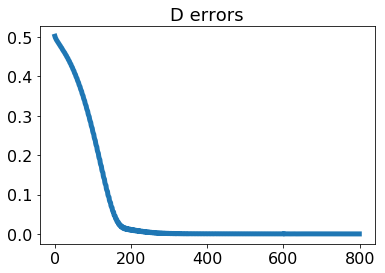

In [3]:
with tf.device("/device:GPU:0"):
    # Construct a SRGAN model
    srgan = SRGAN(N_RES) #Try 2

    # Use the function you wrote earlier to get optimizers for the Discriminator and the Generator
    D_solver, G_solver = get_solvers(dlr=DLR, glr=GLR, beta1=BETA1) #8e-7, 1.2e-7, 

    #Define loss object 
    #Constructor API
    # __init__(self, gen_reg, tv_reg, feat_reg, l1_reg=True, vgg_reg=False, 
    #                  ls_disc=False)
    losses = Loss(gen_reg=GEN_REG, tv_reg=TV_REG, l1_reg=L1_REG, feat_reg=FEAT_REG, vgg_reg=VGG_REG)
    validation_losses = Loss(gen_reg=GEN_REG, tv_reg=TV_REG,  l1_reg=L1_REG, feat_reg=FEAT_REG, vgg_reg=VGG_REG)

    # Run it!
    g_errors, d_errors  = run_a_gan(srgan, D_solver, G_solver, losses, validation_losses,
                                    num_epochs=200, batch_size=BATCH_SIZE, show_every=50,
                                    late_dlr=DLR2, late_glr=GLR2, 
                                    gen_steps_per_discrimination=STEPS,
                                   model_name=NAME)
plt.title('G errors')
plt.plot(g_errors)
plt.yscale('log')
plt.show()

plt.title('D errors')
plt.plot(d_errors)
plt.show()

## Run evaluation 

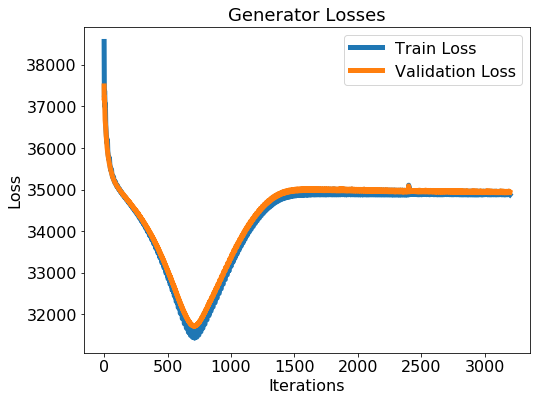

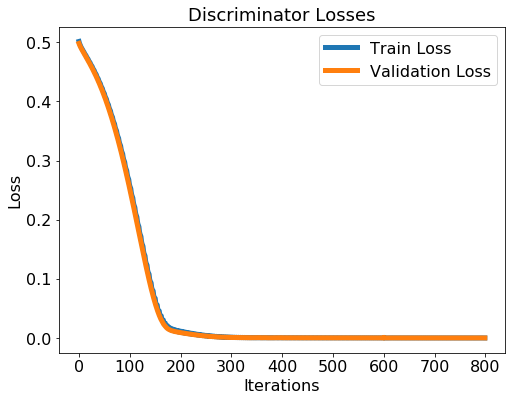

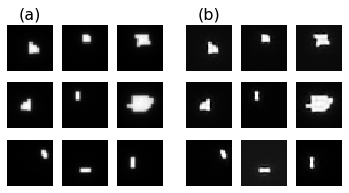

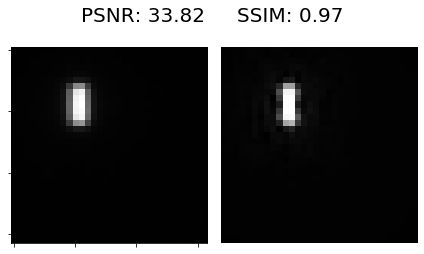

In [4]:
plot_train_val_loss(losses, validation_losses, NAME)
p, s = runEvaluation(NAME)

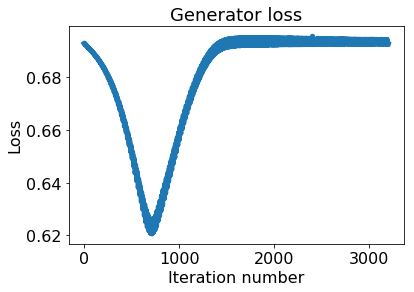

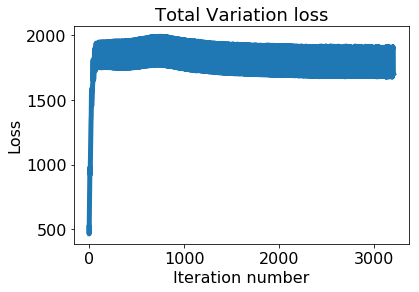

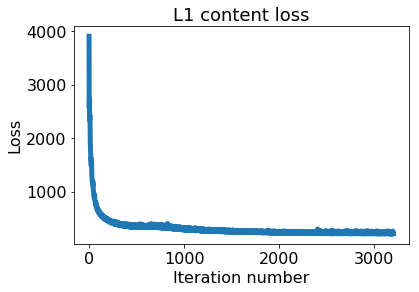

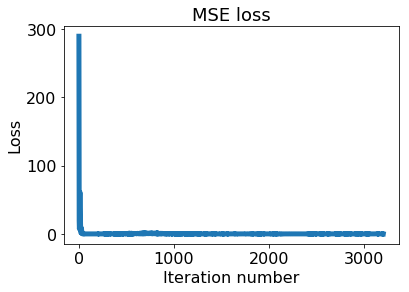

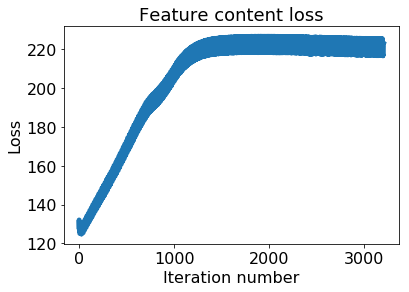

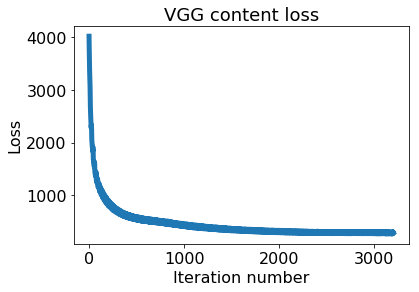

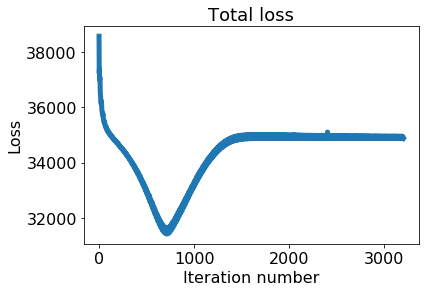

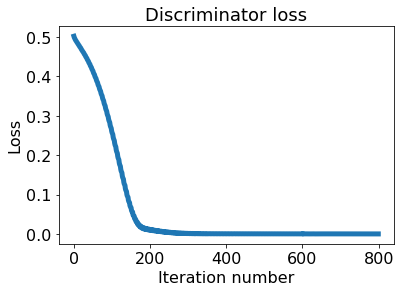

In [5]:
#Extract plots of losses as dictionary loss name -> loss plot
plots = losses.get_loss_plots()